In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno



# **AMONG US**

## **LENDO OS DADOS**

### **USUÁRIOS "NORMAIS"**

In [2]:
users = np.arange(1,30,1)
users

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [3]:
pd.read_csv('User1.csv')

,Game Completed Date,Team,Outcome,Task Completed,All Tasks Completed,Murdered,Imposter Kills,Game Length,Ejected,Sabotages Fixed,Time to complete all tasks,Rank Change,Region/Game Code
0,12/13/2020 at 1:26:56 am EST,Crewmate,Win,3,No,Yes,-,07m 04s,No,2.0,-,++,NA / WYMSBF
1,12/13/2020 at 1:17:42 am EST,Crewmate,Loss,7,Yes,No,-,16m 21s,No,1.0,09m 48s,--,NA / WYMSBF
2,12/13/2020 at 12:57:47 am EST,Crewmate,Win,3,No,No,-,11m 33s,No,0.0,-,++,NA / WYMSBF
3,12/13/2020 at 12:41:55 am EST,Imposter,Win,-,-,-,2,08m 05s,No,NaN,-,+++,Europe / QIRTNF
4,12/13/2020 at 12:30:37 am EST,Crewmate,Loss,4,No,No,-,05m 10s,No,0.0,-,---,Europe / QIRTNF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12/06/2020 at 12:43:22 am EST,Crewmate,Win,8,Yes,Yes,-,11m 29s,No,0.0,05m 01s,++,Europe / RUFQCF
96,12/06/2020 at 12:27:10 am EST,Crewmate,Win,8,Yes,No,-,11m 31s,No,0.0,05m 45s,++,Europe / RUFQCF
97,12/06/2020 at 12:14:34 am EST,Crewmate,Win,8,Yes,No,-,10m 36s,No,0.0,06m 55s,++,Europe / RUFQCF
98,12/06/2020 at 12:02:37 am EST,Crewmate,Loss,8,Yes,Yes,-,11m 12s,No,0.0,07m 43s,--,Europe / RUFQCF


In [4]:
#lendo os dados por usuário e juntando numa lista
data = []
for i in users:
  users_i = pd.read_csv(f'User{i}.csv')
  users_i['User'] = i
  data.append(users_i)

In [5]:
data

[              Game Completed Date      Team  ... Region/Game Code User
 0    12/13/2020 at 1:26:56 am EST  Crewmate  ...      NA / WYMSBF    1
 1    12/13/2020 at 1:17:42 am EST  Crewmate  ...      NA / WYMSBF    1
 2   12/13/2020 at 12:57:47 am EST  Crewmate  ...      NA / WYMSBF    1
 3   12/13/2020 at 12:41:55 am EST  Imposter  ...  Europe / QIRTNF    1
 4   12/13/2020 at 12:30:37 am EST  Crewmate  ...  Europe / QIRTNF    1
 ..                            ...       ...  ...              ...  ...
 95  12/06/2020 at 12:43:22 am EST  Crewmate  ...  Europe / RUFQCF    1
 96  12/06/2020 at 12:27:10 am EST  Crewmate  ...  Europe / RUFQCF    1
 97  12/06/2020 at 12:14:34 am EST  Crewmate  ...  Europe / RUFQCF    1
 98  12/06/2020 at 12:02:37 am EST  Crewmate  ...  Europe / RUFQCF    1
 99  12/05/2020 at 11:45:54 pm EST  Imposter  ...  Europe / RUFQCF    1
 
 [100 rows x 14 columns],
               Game Completed Date      Team  ... Region/Game Code User
 0    12/13/2020 at 1:46:30 am EST  

In [6]:
#unindo os df
df_amongus = data[0].copy()
users_2 = np.arange(1,29,1)
for i in users_2:
  df_amongus = df_amongus.append(data[i])
df_amongus.shape

(2227, 14)

In [7]:
df_amongus

,Game Completed Date,Team,Outcome,Task Completed,All Tasks Completed,Murdered,Imposter Kills,Game Length,Ejected,Sabotages Fixed,Time to complete all tasks,Rank Change,Region/Game Code,User
0,12/13/2020 at 1:26:56 am EST,Crewmate,Win,3,No,Yes,-,07m 04s,No,2.0,-,++,NA / WYMSBF,1
1,12/13/2020 at 1:17:42 am EST,Crewmate,Loss,7,Yes,No,-,16m 21s,No,1.0,09m 48s,--,NA / WYMSBF,1
2,12/13/2020 at 12:57:47 am EST,Crewmate,Win,3,No,No,-,11m 33s,No,0.0,-,++,NA / WYMSBF,1
3,12/13/2020 at 12:41:55 am EST,Imposter,Win,-,-,-,2,08m 05s,No,NaN,-,+++,Europe / QIRTNF,1
4,12/13/2020 at 12:30:37 am EST,Crewmate,Loss,4,No,No,-,05m 10s,No,0.0,-,---,Europe / QIRTNF,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,12/01/2020 at 11:07:41 am EST,Imposter,Loss,-,-,-,2,14m 10s,No,NaN,-,-,NA / SNNGZF,29
42,12/01/2020 at 10:52:25 am EST,Crewmate,Win,7,Yes,No,-,14m 11s,No,1.0,14m 10s,++,NA / SNNGZF,29
43,11/26/2020 at 11:23:14 am EST,Crewmate,Win,7,Yes,No,-,19m 45s,No,1.0,15m 16s,++,Europe / NZWLXQ,29
44,11/26/2020 at 11:00:36 am EST,Crewmate,Win,7,Yes,No,-,10m 18s,No,0.0,06m 13s,++,Europe / NZWLXQ,29


### **STREAMERS**

In [8]:
#lendo dados da segunda fonte
votos_crew = pd.read_csv('/content/crewmate_voting.csv')
votos_crew.tail(5)

,Crewmate,Day,Event,Count
4355,Skadj,8,Voted_Crew,0
4356,ZJ,8,Voted_Crew,1
4357,sponsz,8,Voted_Crew,0
4358,Bim,8,Voted_Crew,2
4359,HunterPence,8,Voted_Crew,2


In [9]:
votos_crew.Event.unique()

array(['Times_Alive', 'Times_Dead', 'Skipped', 'Voted_Impostor',
       'Voted_Crew'], dtype=object)

In [10]:
votos_crew.Crewmate.nunique()

109

In [11]:
game_feed = pd.read_csv('/content/game_feed.csv')
game_feed.head()

,Game,Map,Outcome,Event,Player_Team,Action,Player,Concat1,Role1,Concat,Role,Game_Feed,Getting_Voted_Off,Getting_Killed,Game_Player_That_Died,Day,Dying_Feed,Killing_Feed,Finding_Bodies_Feed,Body_Found_Feed,Meeting_Called_Feed,First_Kill_Feed,Self_Report_Code,Self_Report_Feed,Voted_Off_As_Crew_Feed,Body_Skipped_Feed,Votes_Off_Code,Vote_ID,Day_1_Vote,Crew_Alive,Impostors_Alive,Score,Crew_1,Is_Crew_1_Alive_1,Vote1,Crew_2,Is_Crew_1_Alive_2,Vote2,Crew_3,Is_Crew_3_Alive,Vote3,Crew_4,Is_Crew_4_Alive?,Vote4,Crew_5,Is_Crew_5_alive?,Vote5,Crew_6,Is_Crew_6_Alive?,Vote6,Crew_7,Is_Crew_7_Alive?,Vote7,Crew_8,Is_Crew_8_Alive?,Vote8
0,1,Polus,NaN,5,BK,finds body of,zlubars,1-BK,(Crew),1-zlubars,(Crew).,BK (Crew) finds body of zlubars (Crew).,NaN,NaN,NaN,2,NaN,NaN,BK,zlubars,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1-2,Impostor voted off.,6.0,2.0,6-2,LSV,No,2-LSV-Dead,dokomoy,Yes,2-dokomoy-Impostor voted off.,Keaton,Yes,2-Keaton-Impostor voted off.,zlubars,No,2-zlubars-Dead,BK,Yes,2-BK-Impostor voted off.,Dreamy,Yes,2-Dreamy-Impostor voted off.,5up,Yes,2-5up-Impostor voted off.,Eirik,Yes,2-Eirik-Impostor voted off.
1,1,Polus,NaN,6,Crew,votes off,mani,1-Crew,NaN,1-mani,(Impostor).,Crew votes off mani (Impostor).,mani,NaN,1-mani,2,mani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,6-2,LSV,No,NaN,dokomoy,Yes,NaN,Keaton,Yes,NaN,zlubars,No,NaN,BK,Yes,NaN,Dreamy,Yes,NaN,5up,Yes,NaN,Eirik,Yes,NaN
2,1,Polus,NaN,7,wrapter,kills,Eirik,1-wrapter,(Impostor),1-Eirik,(Crew).,wrapter (Impostor) kills Eirik (Crew).,NaN,Eirik,1-Eirik,3,Eirik,wrapter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,6-1,LSV,No,NaN,dokomoy,Yes,NaN,Keaton,Yes,NaN,zlubars,No,NaN,BK,Yes,NaN,Dreamy,Yes,NaN,5up,Yes,NaN,Eirik,Yes,NaN
3,1,Polus,NaN,8,5up,finds body of,Eirik,1-5up,(Crew),1-Eirik,(Crew).,5up (Crew) finds body of Eirik (Crew).,NaN,NaN,NaN,3,NaN,NaN,5up,Eirik,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1-3,Impostor voted off.,5.0,1.0,5-1,LSV,No,3-LSV-Dead,dokomoy,Yes,3-dokomoy-Impostor voted off.,Keaton,Yes,3-Keaton-Impostor voted off.,zlubars,No,3-zlubars-Dead,BK,Yes,3-BK-Impostor voted off.,Dreamy,Yes,3-Dreamy-Impostor voted off.,5up,Yes,3-5up-Impostor voted off.,Eirik,No,3-Eirik-Dead
4,1,Polus,NaN,9,Crew,votes off,wrapter,1-Crew,NaN,1-wrapter,(Impostor).,Crew votes off wrapter (Impostor).,wrapter,NaN,1-wrapter,3,wrapter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,5-1,LSV,No,NaN,dokomoy,Yes,NaN,Keaton,Yes,NaN,zlubars,No,NaN,BK,Yes,NaN,Dreamy,Yes,NaN,5up,Yes,NaN,Eirik,No,NaN


In [12]:
analise_jogador = pd.read_csv('/content/player_analysis.csv')
analise_jogador.sample(10)

,Index,Players,Total_Games,Crew_Games,Impostor_Games,Impostor_Rate,Crew_Win_Percentage,Impostor_Win_Percentage,Combined_Win_Percentage,Voted_Off_As_Crew,Voted_Off_As_Impostor,Voted_Off_In_Total,Impostor_Kills_Per_Life,Impostor_Deaths_Per_Life,Impostor_Voted_Off_On_Day_One,Imposter_Self_Reports_Per_Life,CoImpostor_Reports_Per_Life,Team_Reports_Per_Life,KDR,Crew_Deaths_Per_Life,Crew_Murdered_Per_Life,Crew_Voted_Off_Per_Life,Crew_Death_On_Day_One,Crew_Bondies_Found_Per_Life,Crew_Voting_Accuracy_Per_Life,Overall_Skill,Crew_Impostor_Win_Rate_Delta,Voting_Aggression
99,NaN,CALC,2,1,1,0.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000,0.000000,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,NaN,NaN,0.000000,NaN
58,NaN,Squirrel_Loot,15,15,0,0.000000,0.800000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,NaN,0.533333,0.533333,0.000000,0.200000,0.133333,0.785714,0.800000,0.800000,0.500000
16,17.0,Andrew,145,120,25,0.172414,0.641667,0.320000,0.586207,0.041667,0.720000,0.158621,2.160000,0.720000,0.200000,0.240000,0.120,0.360000,3.000000,0.625000,0.583333,0.041667,0.183333,0.400000,0.732824,0.943627,0.321667,0.539095
49,NaN,Toffel,22,18,4,0.181818,0.500000,0.250000,0.454545,0.166667,0.750000,0.272727,0.750000,0.750000,0.500000,0.000000,0.000,0.000000,1.000000,0.666667,0.500000,0.166667,0.166667,0.111111,0.736842,0.666667,0.250000,0.487179
35,36.0,dcsports8,46,38,8,0.173913,0.684211,0.000000,0.565217,0.131579,1.000000,0.282609,1.500000,1.000000,0.625000,0.250000,0.125,0.375000,1.500000,0.578947,0.447368,0.131579,0.210526,0.368421,0.731707,0.684211,0.684211,0.577465
66,NaN,LegenVD,13,12,1,0.076923,0.333333,0.000000,0.307692,0.000000,1.000000,0.076923,2.000000,1.000000,0.000000,0.000000,0.000,0.000000,2.000000,0.750000,0.750000,0.000000,0.083333,0.083333,0.533333,0.333333,0.333333,0.517241
73,NaN,Wolf,8,7,1,0.125000,0.571429,0.000000,0.500000,0.000000,1.000000,0.125000,3.000000,1.000000,0.000000,0.000000,0.000,0.000000,3.000000,0.285714,0.285714,0.000000,0.000000,0.142857,0.700000,0.571429,0.571429,0.416667
103,NaN,Adrien,2,2,0,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,NaN,0.500000,0.500000,0.000000,0.000000,0.000000,NaN,0.500000,0.500000,0.000000
50,NaN,Emily,19,13,6,0.315789,0.615385,0.166667,0.473684,0.076923,0.833333,0.315789,1.833333,0.833333,0.333333,0.166667,0.000,0.166667,2.200000,0.692308,0.615385,0.076923,0.153846,0.230769,0.764706,0.738462,0.448718,0.607143
21,22.0,BRazz,61,46,15,0.245902,0.673913,0.266667,0.573770,0.086957,0.866667,0.278689,2.133333,0.866667,0.000000,0.000000,0.200,0.200000,2.461538,0.717391,0.630435,0.086957,0.239130,0.152174,0.735294,0.918972,0.407246,0.447368


In [13]:
amongus_twitch = pd.read_csv('/content/player_record.csv')
amongus_twitch

,Players,Games_Played,Crew_Games,Crew_Wins_Voting,Crew_Wins_Tasks,Crew_Losses_Kills,Crew_Losses_Sabotage,Crew_Wins_Combined,Crew_Losses,Impostor_Games,Impostor_Wins_Kills,Impostor_Wins_Sabotage,Impostor_Wins_Combined,Impostor_Losses,Total_Wins,Total_Losses,Kills,Deaths_Voted_off_as_Impostor,Deaths_Voted_Off_As_Crew,Deaths_Murdered,Deaths_Total,Number_Of_Bodies_Found_As_Crew,Self_Reports,CoImpostor_Bodies_Found,Total_Bodies_Found,Times_Found_As_Body,Emergency_Meetings_Called,Killed_On_Day,Impostor_Aggression,Times_Killed_Day_One,Times_Voted_Off_Day_One_As_Impostor,Number_Of_Games_This_Player_Survived_Day_One_As_Crew
0,BK,271,217,121,21,74,1,142,75,54,33,0,33,21,175,96,113,22,13,119,154,71,6,3,80,65,14,2.159664,2.292035,45,6,217
1,Dreamy,40,33,19,2,12,0,21,12,7,0,0,0,7,21,19,17,6,4,13,23,8,3,0,11,5,4,1.846154,2.058824,5,1,33
2,5up,17,12,9,0,3,0,9,3,5,5,0,5,0,14,3,14,0,0,5,5,5,0,2,7,3,2,2.200000,2.714286,1,0,12
3,Eirik,33,26,16,1,9,0,17,9,7,4,0,4,3,21,12,11,4,3,13,20,6,0,1,7,7,2,2.307692,2.000000,7,1,26
4,wrapter,102,82,49,4,28,1,53,29,20,11,0,11,9,64,38,51,9,6,54,69,26,5,1,32,29,13,2.407407,2.058824,15,2,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Skadj,2,2,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,3.000000,NaN,0,0,2
101,ZJ,7,7,4,3,0,0,7,0,0,0,0,0,0,7,0,0,0,0,2,2,1,0,0,1,2,0,1.000000,NaN,2,0,7
102,sponsz,4,3,1,1,1,0,2,1,1,0,0,0,1,2,2,3,1,0,1,2,1,0,0,1,0,0,1.000000,4.000000,1,0,3
103,Bim,5,3,2,0,1,0,2,1,2,0,0,0,2,2,3,5,2,0,0,2,0,0,0,0,0,0,NaN,2.800000,0,0,3


## **CONHECENDO OS DADOS**

In [14]:
df_amongus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227 entries, 0 to 45
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Game Completed Date         2227 non-null   object 
 1   Team                        2227 non-null   object 
 2   Outcome                     2227 non-null   object 
 3   Task Completed              2227 non-null   object 
 4   All Tasks Completed         2227 non-null   object 
 5   Murdered                    2227 non-null   object 
 6   Imposter Kills              2227 non-null   object 
 7   Game Length                 2227 non-null   object 
 8   Ejected                     2227 non-null   object 
 9   Sabotages Fixed             1761 non-null   float64
 10  Time to complete all tasks  2227 non-null   object 
 11  Rank Change                 1828 non-null   object 
 12  Region/Game Code            2227 non-null   object 
 13  User                        2227 no

In [15]:
df_amongus['Rank Change'].unique()

array(['++', '--', '+++', '---', '-', nan], dtype=object)

In [16]:
df_amongus['Sabotages Fixed'].unique()

array([ 2.,  1.,  0., nan,  3.,  4.,  5.])

#### VISUALIZANDO NULOS

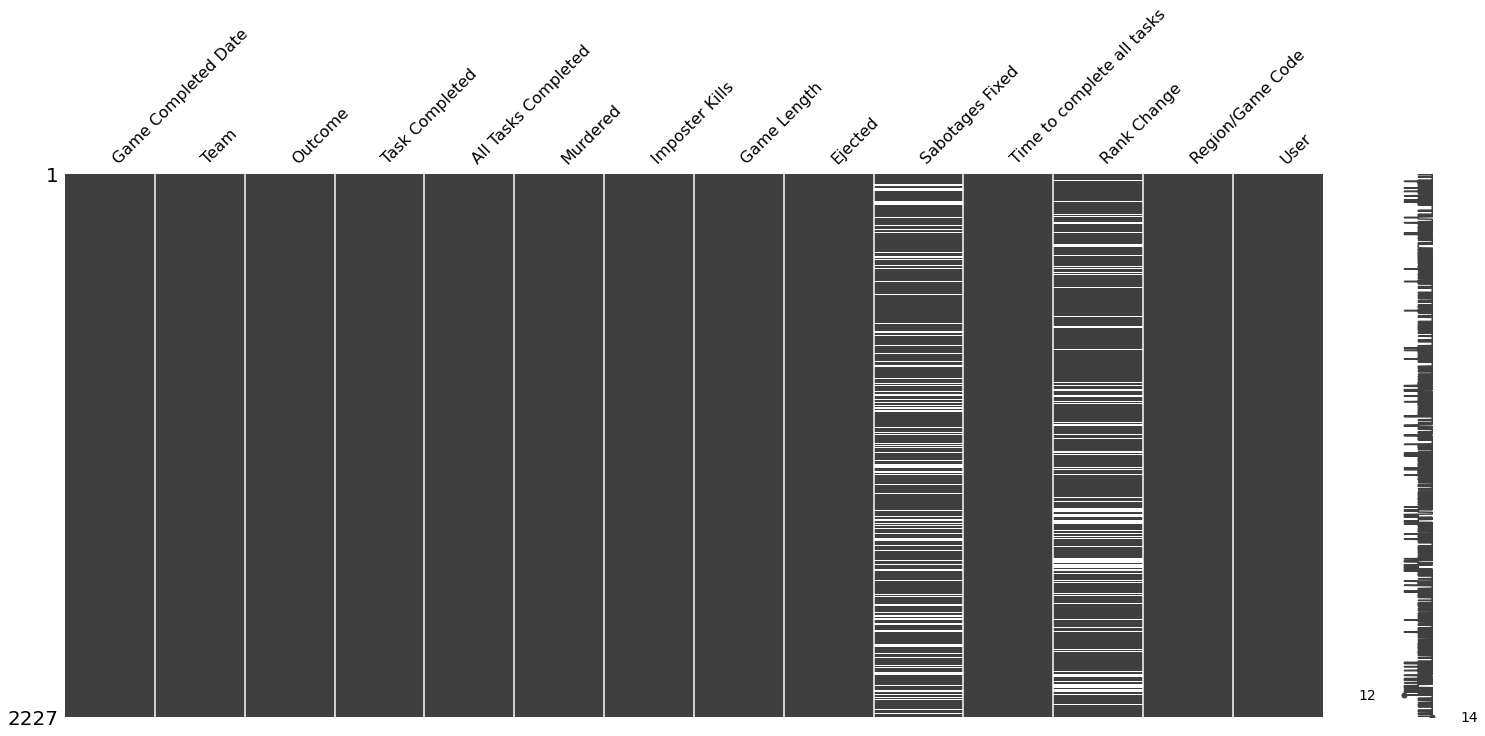

In [17]:
msno.matrix(df_amongus);

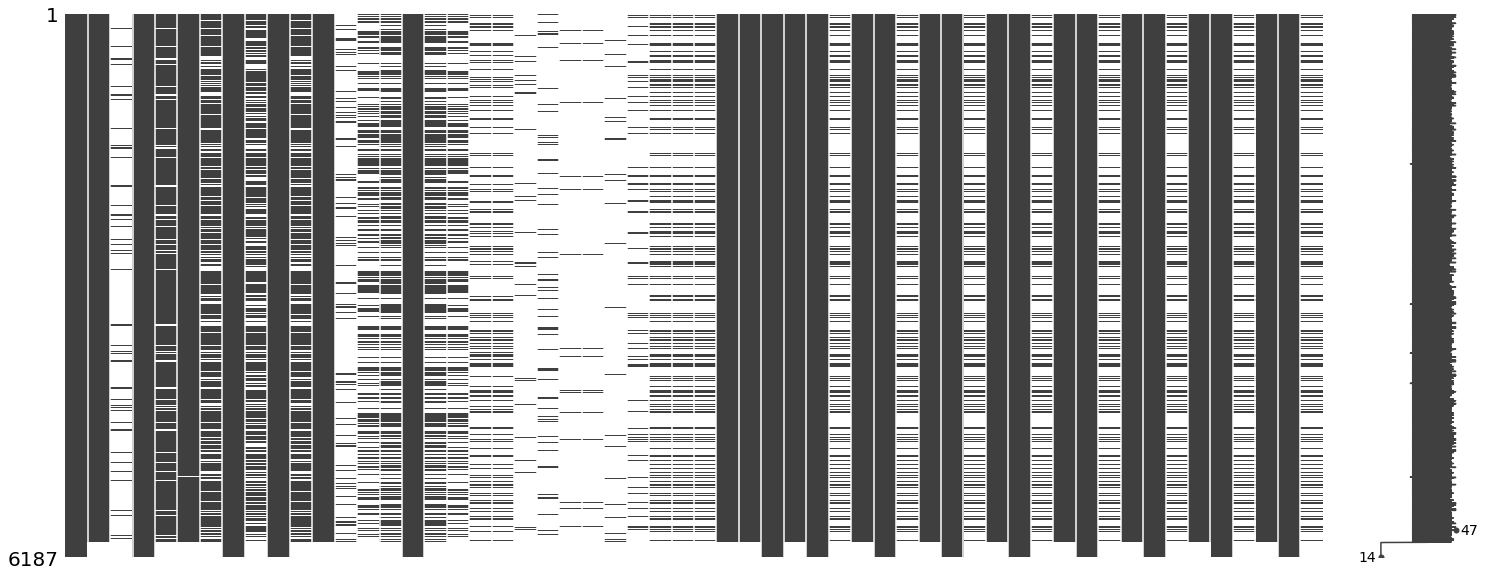

In [18]:
msno.matrix(game_feed);

#### TRATANDO DADOS

In [19]:
amongus_users = df_amongus.copy()

In [20]:
amongus_users.columns

Index(['Game Completed Date', 'Team', 'Outcome', 'Task Completed',
       'All Tasks Completed', 'Murdered', 'Imposter Kills', 'Game Length',
       'Ejected', 'Sabotages Fixed', 'Time to complete all tasks',
       'Rank Change', 'Region/Game Code', 'User'],
      dtype='object')

In [21]:
#transformando dados em listas
amongus_users[['Date', 'at','Hour', 'am/pm','Time Zone']] = amongus_users['Game Completed Date'].str.split(" ",expand=True)
amongus_users[['Region','Game Code']] = amongus_users['Region/Game Code'].str.split("/",expand=True)
amongus_users.head()

,Game Completed Date,Team,Outcome,Task Completed,All Tasks Completed,Murdered,Imposter Kills,Game Length,Ejected,Sabotages Fixed,Time to complete all tasks,Rank Change,Region/Game Code,User,Date,at,Hour,am/pm,Time Zone,Region,Game Code
0,12/13/2020 at 1:26:56 am EST,Crewmate,Win,3,No,Yes,-,07m 04s,No,2.0,-,++,NA / WYMSBF,1,12/13/2020,at,1:26:56,am,EST,NA,WYMSBF
1,12/13/2020 at 1:17:42 am EST,Crewmate,Loss,7,Yes,No,-,16m 21s,No,1.0,09m 48s,--,NA / WYMSBF,1,12/13/2020,at,1:17:42,am,EST,NA,WYMSBF
2,12/13/2020 at 12:57:47 am EST,Crewmate,Win,3,No,No,-,11m 33s,No,0.0,-,++,NA / WYMSBF,1,12/13/2020,at,12:57:47,am,EST,NA,WYMSBF
3,12/13/2020 at 12:41:55 am EST,Imposter,Win,-,-,-,2,08m 05s,No,NaN,-,+++,Europe / QIRTNF,1,12/13/2020,at,12:41:55,am,EST,Europe,QIRTNF
4,12/13/2020 at 12:30:37 am EST,Crewmate,Loss,4,No,No,-,05m 10s,No,0.0,-,---,Europe / QIRTNF,1,12/13/2020,at,12:30:37,am,EST,Europe,QIRTNF


In [22]:
amongus_users['Time Zone'].value_counts()

EST    2227
Name: Time Zone, dtype: int64

In [23]:
amongus_users['am/pm'].value_counts()

pm    1743
am     484
Name: am/pm, dtype: int64

In [24]:
amongus_users.drop(['Game Completed Date', 'Region/Game Code', 'at','Time Zone'],axis=1, inplace=True)

In [25]:
amongus_users.Region.value_counts()

NA         1436
Europe      791
Name: Region, dtype: int64

In [26]:
amongus_users['Game Code'].nunique()

498

In [27]:
#transformando a data em formato datetime
amongus_users['Date'] = pd.to_datetime(amongus_users['Date'])

In [28]:
amongus_users

,Team,Outcome,Task Completed,All Tasks Completed,Murdered,Imposter Kills,Game Length,Ejected,Sabotages Fixed,Time to complete all tasks,Rank Change,User,Date,Hour,am/pm,Region,Game Code
0,Crewmate,Win,3,No,Yes,-,07m 04s,No,2.0,-,++,1,2020-12-13,1:26:56,am,NA,WYMSBF
1,Crewmate,Loss,7,Yes,No,-,16m 21s,No,1.0,09m 48s,--,1,2020-12-13,1:17:42,am,NA,WYMSBF
2,Crewmate,Win,3,No,No,-,11m 33s,No,0.0,-,++,1,2020-12-13,12:57:47,am,NA,WYMSBF
3,Imposter,Win,-,-,-,2,08m 05s,No,NaN,-,+++,1,2020-12-13,12:41:55,am,Europe,QIRTNF
4,Crewmate,Loss,4,No,No,-,05m 10s,No,0.0,-,---,1,2020-12-13,12:30:37,am,Europe,QIRTNF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,Imposter,Loss,-,-,-,2,14m 10s,No,NaN,-,-,29,2020-12-01,11:07:41,am,NA,SNNGZF
42,Crewmate,Win,7,Yes,No,-,14m 11s,No,1.0,14m 10s,++,29,2020-12-01,10:52:25,am,NA,SNNGZF
43,Crewmate,Win,7,Yes,No,-,19m 45s,No,1.0,15m 16s,++,29,2020-11-26,11:23:14,am,Europe,NZWLXQ
44,Crewmate,Win,7,Yes,No,-,10m 18s,No,0.0,06m 13s,++,29,2020-11-26,11:00:36,am,Europe,NZWLXQ


In [29]:
amongus_users['Date'].nunique()

46

In [34]:
salas = amongus_users.groupby('Game Code').agg({'User': 'nunique'}).reset_index()
salas

,Game Code,User
0,ABPPWQ,1
1,ACLNSF,2
2,AHNVOF,3
3,AIBHKF,1
4,AKGECF,1
...,...,...
493,ZQVGNF,1
494,ZRMIOF,1
495,ZVBKBF,1
496,ZVSFRQ,1


In [35]:
salas.query('User > 1')

,Game Code,User
1,ACLNSF,2
2,AHNVOF,3
9,ATIEWQ,2
12,AWYBXQ,2
14,BAPQFF,2
...,...,...
429,UZSYCF,2
441,VTTXQQ,2
467,XVMZZF,2
469,XYBZDF,2


In [40]:
salas[salas['User'] == salas['User'].max()]['Game Code']

63     DSYWJF
Name: Game Code, dtype: object

In [44]:
sala_max = amongus_users[amongus_users['Game Code'] == ' DSYWJF']

In [45]:
sala_max.shape

(47, 17)

In [47]:
pd.crosstab(sala_max['User'], sala_max['Team'])

Team,Crewmate,Imposter
User,,
1,5,0
6,6,2
7,6,2
9,3,2
12,8,1
13,8,1
25,3,0


In [48]:
sala_max.Date.unique()

array(['2020-12-06T00:00:00.000000000'], dtype='datetime64[ns]')

In [52]:
sala_max['Hour'].nunique()

34

In [53]:
pd.crosstab(sala_max['Hour'], sala_max['User'])

User,1,6,7,9,12,13,25
Hour,,,,,,,
3:30:50,0,0,0,0,1,0,0
3:30:51,1,0,0,0,0,0,0
3:48:05,0,0,0,0,1,0,0
3:48:06,1,0,0,0,0,0,0
3:59:01,0,0,0,0,1,0,0
3:59:02,1,0,0,0,0,0,0
4:12:28,1,0,0,0,1,0,0
4:34:13,1,0,0,0,1,0,0
5:11:12,0,0,0,0,0,1,0


In [54]:
sala_max.groupby('Hour').agg({'User': 'nunique'}).reset_index()

,Hour,User
0,3:30:50,1
1,3:30:51,1
2,3:48:05,1
3,3:48:06,1
4,3:59:01,1
5,3:59:02,1
6,4:12:28,2
7,4:34:13,2
8,5:11:12,1
9,5:34:55,1


In [56]:
pd.crosstab(amongus_users['Team'], amongus_users['Outcome'],normalize='index')

Outcome,Loss,Win
Team,,
Crewmate,0.442930,0.557070
Imposter,0.439914,0.560086


In [63]:
pd.options.display.float_format = '{:,.2f}%'.format
pd.crosstab(amongus_users['User'], [amongus_users['Team'], amongus_users['Outcome']], normalize='index')*100

Team    Crewmate        Imposter       
Outcome     Loss    Win     Loss    Win
User                                   
1         33.00% 44.00%    9.00% 14.00%
2         40.00% 37.00%   13.00% 10.00%
3         38.46% 36.26%   16.48%  8.79%
4         41.00% 40.00%   12.00%  7.00%
5         45.71% 42.86%    2.86%  8.57%
6         35.00% 51.00%    6.00%  8.00%
7         38.00% 47.00%    7.00%  8.00%
8         22.00% 59.00%    8.00% 11.00%
9         35.00% 44.00%    9.00% 12.00%
10        34.00% 42.00%   11.00% 13.00%
11        32.26% 38.71%    9.68% 19.35%
12        35.00% 44.00%   11.00% 10.00%
13        31.00% 45.00%    6.00% 18.00%
14        27.00% 44.00%    9.00% 20.00%
15        43.59% 41.03%    7.69%  7.69%
16        34.29% 45.71%    1.43% 18.57%
17        31.94% 45.83%    4.17% 18.06%
18        38.00% 44.00%   13.00%  5.00%
19        26.32% 52.63%   13.16%  7.89%
20        45.31% 29.69%   10.94% 14.06%
21        32.91% 44.30%   12.66% 10.13%
22        39.00% 41.00%    9.00% 11.00%
23        29.73% 51.35%    5.41% 13.51%
24        28.95% 52.63%    7.89% 10.53%
25        40.00% 40.00%   11.00%  9.00%
26        21.21% 45.45%   12.12% 21.21%
27        37.00% 43.00%    6.00% 14.00%
28        42.59% 38.89%    7.41% 11.11%
29        28.26% 56.52%    8.70%  6.52%

In [66]:
impostor = amongus_users[amongus_users['Team'] == 'Imposter']
crewmate = amongus_users[amongus_users['Team'] == 'Crewmate']

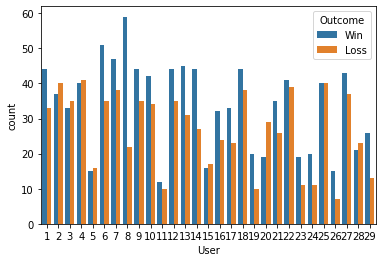

In [73]:
sns.countplot(data=crewmate, x='User', hue='Outcome');